# Solving Congruences

We've seen that it's not easy, or even possible, to match up every ciphertext letter with its plaintext counterpart based solely on frequency. But what if you could get one or two matched correctly?

## Cracking Affine

Suppose we have the following ciphertext which we believe to be enciphered using the Affine cipher and unknown keys. This is the same text from the last section, only shortened for simplicity.

In [13]:
ciphertext = 'KRETI JUKRP TUCHI GRDPT UHUJK XUDET IVVKP RIPER EYPWD KHPWO UPTIJ ULKJJ UDOKP TPTUU RDYIL OIHAY ERDER IINWY AUJJR IHWUP EDHWV EHUYE RDWTI JUOKP TRIPT KRCKR KPPIY KPDIO RIRIH PIUEP KPOEY ETIVV KPTIJ UERDP TEPAU ERYMI ALIHP'

Looking at the frequency distribution:

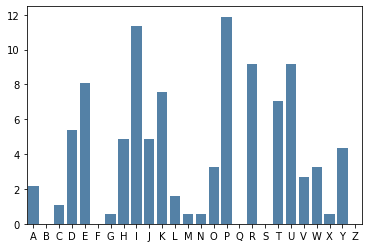

In [14]:
from seaborn import barplot

def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

def letterFrequency(text):
    text = textClean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = letterFrequency(ciphertext)
barplot(labels, values, color='steelblue');

We can see that `P`, `I`, `R`, and `T` are the most common letters in the ciphertext. Since `e` is the most common letter in English, let's suppose that the ciphertext letter `P` was enciphered from the plaintext letter `e`.

We know that the ciphertext letter was enciphered using the formula:

$$ y \equiv ax + b \pmod{26}$$ 

where $a$ is the multiplicative key that is relatively prime to $26$ and $b$ is the additive key. Our guess that `e` enciphers to `P` implies that when $x = 4$ (an `e`) $y = 15$ (a `P`). Evaluating the encipher equation with these values yields:

$$15 \equiv 4a + b \pmod{26}$$

This equation alone is not enough to determine $a$ and $b$. You will need the same number of equations as unknown to be able to solve the system, so you'll need to make a second guess to determine a second equation. Since T is the second most frequent letter in the English alphabet it would be reasonable to assume that ciphertext letter `I` was enciphered from the plaintext letter `t`, since `I` is the second most frequent letter in the ciphertext. Following the same procedure as earlier yields the second equation:

$$ 8 \equiv 19a + b \pmod{26}$$

We can solve the system of congruences:

$$\begin{cases} 15 &\equiv 4a + b \pmod{26} \\ 8 &\equiv 19a + b \pmod{26} \end{cases}$$

To solve this system of linear equations, we'll employ the elimination method by subtracting multiplies of one equation from another to generate a new equation. In this case, subtracting the second congruence from the first one eliminates $b$, resulting in a congruence with only one unknown:

$$ 7 \equiv -15a \pmod{26} $$

and since $-15 \equiv 11 \pmod{26}$ we know:

$$ 7 \equiv 11a \pmod{26} $$

Multiplying both sides by the multiplicative inverse of $11 \pmod{26}$, which is $19$, we find:

$$ 19 \cdot 7 \equiv 19 \cdot 11 a \pmod{26} $$

and so

$$ 3 \equiv a \pmod{26} $$

Solving for $b$:

$$ \begin{align} 15 &\equiv 4 \left(3\right) + b \\ 15 &\equiv 12 + b \\ b &= 3 \end{align}$$

Unfortunately, when we use these values for `akey` and `mkey`, we don't get a readable plaintext:

In [18]:
def affineDecipher(text, akey, mkey):
    ciphertext = textClean(text)
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    plaintext = ''
    minverse = -1
    
    for testinverse in range(0,26):
        if (testinverse * mkey) % 26 == 1:
            minverse = testinverse
    
    for char in ciphertext:
        plaintext += LETTERS[ minverse * (LETTERS.find(char) - akey) % 26 ]
    
    return plaintext.lower()

In [16]:
print( affineDecipher( ciphertext, 3, 3 ))

lwjotcxlweoxrktbwaeoxkxclyxajotgglewtejwjhepalkepvxeotcxulccxavleoeoxxwahtuvtkzhjwajwttmphzxccwtkpxejakpgjkxhjwapotcxvleowteolwrlwleethleatvwtwtketxjelevjhjotggleotcxjwaeojezxjwhdtzutke


So, what went wrong? In the original, unenciphered message, there's an unusually high amount of the plaintext letter `o` and an unusually low amount of the plaintext letter `e`. There was no way for you to know this (the plaintext is by nature secret when deciphering), and as a result, your guesses of $\text{e} \rightarrow \text{P}$ and $\text{t} \rightarrow \text{I}$ were incorrect. Incorrect guesses will either lead to incorrect deciphering of the ciphertext or invalid values for $a$ (values that are not relatively prime with 26). 

Let's readjust our guesses to reflect this information so $\text{o} \rightarrow \text{I}$ and $\text{t} \rightarrow \text{P}$ which results in the following solution:

$$\begin{cases} 8 &\equiv 14a + b \pmod{26} \\ 15 &\equiv 19a + b \pmod{26} \end{cases}$$

Subtracting the second equation from the first:

$$-7 \equiv -5a \pmod{26}$$

which is equivalent to:

$$19 \equiv 21a \pmod{26}$$

Multiplying  by the inverse of $21 \pmod{26}$, which is $5$.

$$ 5 \cdot 19 \equiv 5 \cdot 21 a \pmod{26} $$

and so:

$$ 17 \equiv a \pmod{26} $$

Solving for $b$:

$$ \begin{align} 8 &\equiv 14 \left(17\right) + b \pmod{26} \\ 8 &\equiv 238 + b \pmod{26} \\ -230 &\equiv  b \pmod{26} \\ b &= 4 \end{align}$$

Attempting to decipher with a multiplicative key of 17 and additive key of 4 yields the following plaintext:

In [17]:
print( affineDecipher( ciphertext, 4, 17))

inaholeinthegroundtherelivedahobbitnotanastydirtywetholefilledwiththeendsofwormsandanoozysmellnoryetadrybaresandyholewithnothinginittositdownonortoeatitwasahobbitholeandthatmeanscomfort


Which we can see is the phrase:
> In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.

As long as you can guess two pairs of corresponding plaintext and ciphertext letters, this method will determine the correct additive and multiplicative keys to map the two together.